In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('horse.csv')

In [3]:
df.head(5)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [8]:
#df.drop('hospital_number',axis = 1,inplace = True)
df.drop(['lesion_1','lesion_2','lesion_3','cp_data'],axis = 1,inplace= True)

### hospital number , lesion_1,lesion_2,lesion_3,cp_data,abdomo_protein and abdomo_apperance,nasogastric_reflux_ph have been dropped. 

In [10]:
df.drop('abdomo_protein',inplace=True,axis = 1)
#deleted abdomo_protein cause of lack of values

In [12]:
df.drop('abdomo_appearance',inplace=True,axis = 1)

In [25]:
df.drop('nasogastric_reflux_ph',inplace=True,axis = 1)

In [13]:
#categorical to numerical 

surgery = pd.get_dummies(df['surgery'],drop_first=True)

In [14]:
age = pd.get_dummies(df['age'],drop_first=True)

In [15]:
surgical_lesion = pd.get_dummies(df['surgical_lesion'],drop_first=True)

In [16]:
df.drop(['surgery','age','surgical_lesion',],axis=1,inplace=True)

In [18]:
df = pd.concat([df,surgery,age,surgical_lesion],axis=1)

In [27]:
df.head()

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgery,young,surgical_lesion
0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,45.0,8.4,died,0,0,0
1,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,50.0,85.0,euthanized,1,0,0
2,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,33.0,6.7,lived,0,0,0
3,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,48.0,7.2,died,1,1,1
4,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,died,0,0,0


In [26]:
df.columns=['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities','peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain','peristalsis', 'abdominal_distention', 'nasogastric_tube','nasogastric_reflux','rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein','outcome', 'surgery','young', 'surgical_lesion']

In [23]:
#imputing missing values 
#1)rectal_temp
df['rectal_temp'].mean()

def impute_rectaltemp(cols):
    rectal_temp = cols[0]
   
    
    if pd.isnull(rectal_temp):
        return 38.168

    else:
        return rectal_temp
    

df['rectal_temp'] = df[['rectal_temp']].apply(impute_rectaltemp,axis=1)


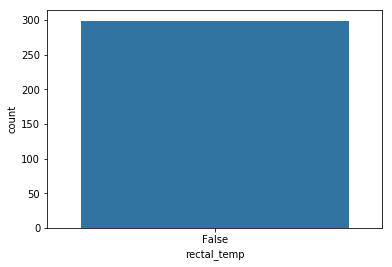

In [24]:
sns.countplot(df['rectal_temp'].isnull())

In [28]:
#2) respiratory rate

df['respiratory_rate'].mean()

def impute_respiratoryrate(cols):
    respiratory_rate = cols[0]
   
    
    if pd.isnull(respiratory_rate):
        return 30.460

    else:
        return respiratory_rate
    
df['respiratory_rate'] = df[['respiratory_rate']].apply(impute_respiratoryrate,axis=1)


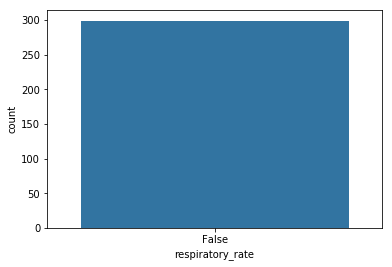

In [29]:
sns.countplot(df['respiratory_rate'].isnull())

In [30]:
#3)pulse

df['pulse'].mean()

#impute for 'pulse'
def impute_pulse(cols):
    pulse = cols[0]
   
    
    if pd.isnull(pulse):
        return 72.0

    else:
        return pulse

df['pulse'] = df[['pulse']].apply(impute_pulse,axis=1)



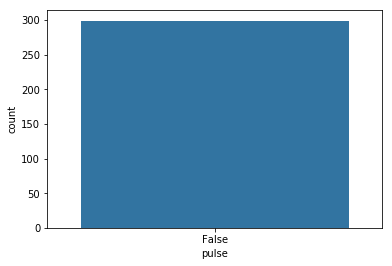

In [31]:
sns.countplot(df['pulse'].isnull())

In [32]:
df.head(5)

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgery,young,surgical_lesion
0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,45.0,8.4,died,0,0,0
1,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,50.0,85.0,euthanized,1,0,0
2,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,33.0,6.7,lived,0,0,0
3,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,48.0,7.2,died,1,1,1
4,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,died,0,0,0


In [33]:
#4)total protein
df['total_protein'].mode()

def impute_totalprotein(cols):
    total_protein = cols[0]
   
    
    if pd.isnull(total_protein):
        return 24.2744

    else:
        return total_protein
    
df['total_protein'] = df[['total_protein']].apply(impute_totalprotein,axis=1)

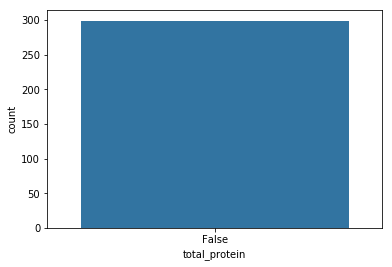

In [34]:
sns.countplot(df['total_protein'].isnull())

In [35]:
#5) packed cell volume

df['packed_cell_volume'].mean()

def impute_pcv(cols):
    packed_cell_volume = cols[0]
   
    
    if pd.isnull(packed_cell_volume):
        return 46.307

    else:
        return packed_cell_volume
    
df['packed_cell_volume'] = df[['packed_cell_volume']].apply(impute_pcv,axis=1)



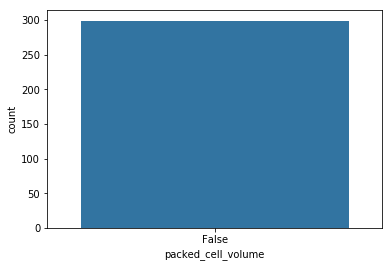

In [36]:
sns.countplot(df['packed_cell_volume'].isnull())

In [37]:
df.head()

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgery,young,surgical_lesion
0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,45.0,8.4,died,0,0,0
1,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,50.0,85.0,euthanized,1,0,0
2,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,33.0,6.7,lived,0,0,0
3,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,48.0,7.2,died,1,1,1
4,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,died,0,0,0


In [38]:
##imputing categorical variables with "<UNK>"

#1) abdomen 

def impute_abd(cols):
    abd = cols[0]
   
    
    if pd.isnull(abd):
        return "<UNK>"

    else:
        return abd
    
df['abdomen'] = df[['abdomen']].apply(impute_abd,axis=1)

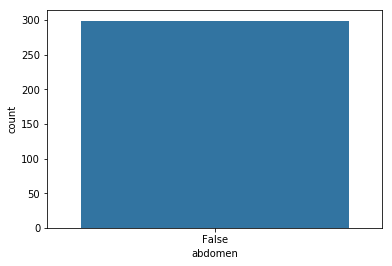

In [39]:
sns.countplot(df['abdomen'].isnull())

In [40]:
##2) temp of extremities

def impute_toe(cols):
    temp_of_extremities = cols[0]
   
    
    if pd.isnull(temp_of_extremities):
        return "<UNK>"

    else:
        return temp_of_extremities
    
df['temp_of_extremities'] = df[['temp_of_extremities']].apply(impute_toe,axis=1)

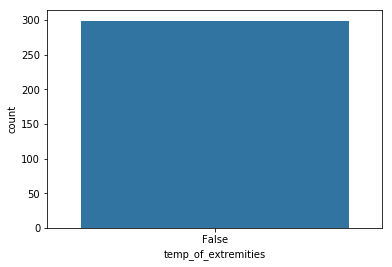

In [41]:
sns.countplot(df['temp_of_extremities'].isnull())

In [42]:
##3) peripheral pulse

def impute_pp(cols):
    peripheral_pulse = cols[0]
   
    
    if pd.isnull(peripheral_pulse):
        return "<UNK>"

    else:
        return peripheral_pulse
    
df['peripheral_pulse'] = df[['peripheral_pulse']].apply(impute_pp,axis=1)

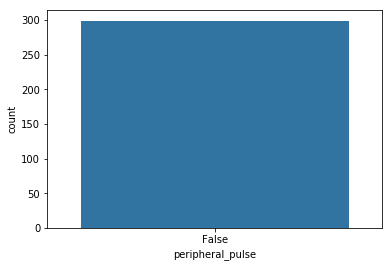

In [43]:
sns.countplot(df['peripheral_pulse'].isnull())


In [44]:
##4) mucous membrane 

def impute_mm(cols):
    mucous_membrane = cols[0]
   
    
    if pd.isnull(mucous_membrane):
        return "<UNK>"

    else:
        return mucous_membrane
    
df['mucous_membrane'] = df[['mucous_membrane']].apply(impute_mm,axis=1)



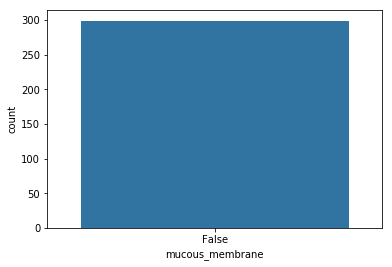

In [45]:
sns.countplot(df['mucous_membrane'].isnull())

In [46]:
##5) capillary refill time

def impute_crt(cols):
    crt = cols[0]
   
    
    if pd.isnull(crt):
        return "<UNK>"

    else:
        return crt
    
    
df['capillary_refill_time'] = df[['capillary_refill_time']].apply(impute_crt,axis=1)

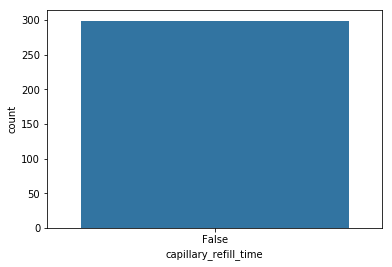

In [47]:
sns.countplot(df['capillary_refill_time'].isnull())

In [48]:
##6) pain

def impute_pain(cols):
    pain = cols[0]
   
    
    if pd.isnull(pain):
        return "<UNK>"

    else:
        return pain
    
df['pain'] = df[['pain']].apply(impute_pain,axis=1)

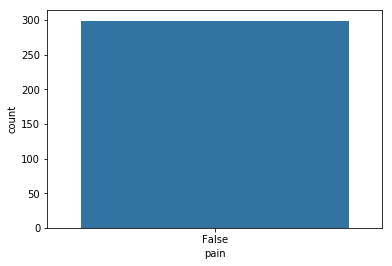

In [49]:
sns.countplot(df['pain'].isnull())

In [50]:
##7) peristalsis

def impute_peristalsis(cols):
    peristalsis = cols[0]
   
    
    if pd.isnull(peristalsis):
        return "<UNK>"

    else:
        return peristalsis
    
df['peristalsis'] = df[['peristalsis']].apply(impute_peristalsis,axis=1)

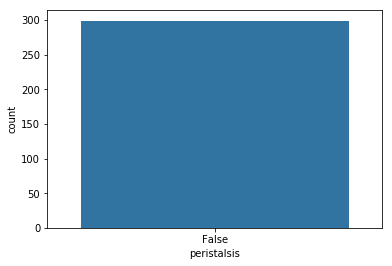

In [51]:
sns.countplot(df['peristalsis'].isnull())

In [52]:
##8) abdominal distention

def impute_abddist(cols):
    abddist = cols[0]
   
    
    if pd.isnull(abddist):
        return "<UNK>"

    else:
        return abddist
    
df['abdominal_distention'] = df[['abdominal_distention']].apply(impute_abddist,axis=1)

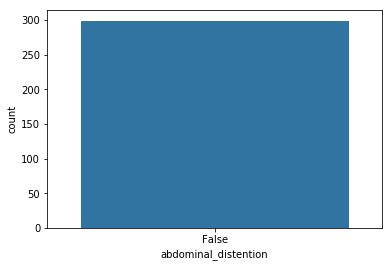

In [53]:
sns.countplot(df['abdominal_distention'].isnull())



In [54]:
##9) nasogastric reflux

def impute_nsref(cols):
    nsref = cols[0]
   
    
    if pd.isnull(nsref):
        return "<UNK>"

    else:
        return nsref
    
df['nasogastric_reflux'] = df[['nasogastric_reflux']].apply(impute_nsref,axis=1)

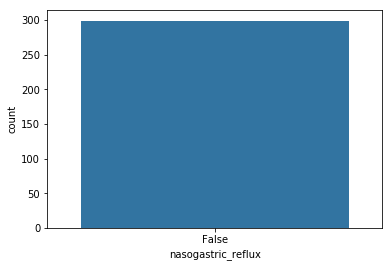

In [55]:
sns.countplot(df['nasogastric_reflux'].isnull())

In [56]:
#10) nasogastric tube 

def impute_nstub(cols):
    nstub = cols[0]
   
    
    if pd.isnull(nstub):
        return "<UNK>"

    else:
        return nstub
    
df['nasogastric_tube'] = df[['nasogastric_tube']].apply(impute_nstub,axis=1)

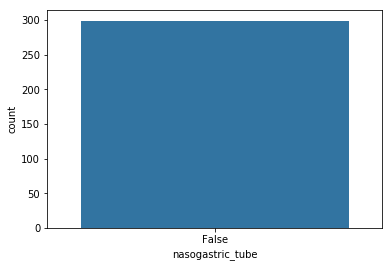

In [57]:
sns.countplot(df['nasogastric_tube'].isnull())

In [58]:
#11 ) rectal exam feces

def impute_recex(cols):
    recex = cols[0]
   
    
    if pd.isnull(recex):
        return "<UNK>"

    else:
        return recex
    
df['rectal_exam_feces'] = df[['rectal_exam_feces']].apply(impute_recex,axis=1)

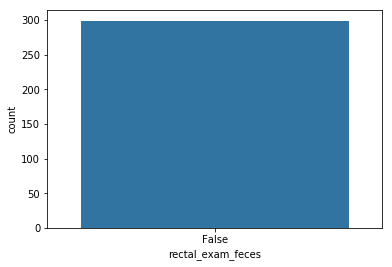

In [59]:
sns.countplot(df['rectal_exam_feces'].isnull())

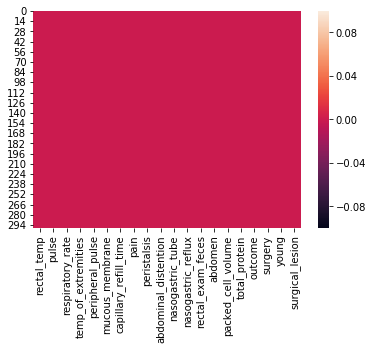

In [60]:
sns.heatmap(df.isnull())
#shows that there are no nan values

In [82]:

df.head()

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgery,young,surgical_lesion
0,38.5,66.0,28.0,cool,reduced,<UNK>,more_3_sec,extreme_pain,absent,severe,<UNK>,<UNK>,decreased,distend_large,45.0,8.4,died,0,0,0
1,39.2,88.0,20.0,<UNK>,<UNK>,pale_cyanotic,less_3_sec,mild_pain,absent,slight,<UNK>,<UNK>,absent,other,50.0,85.0,euthanized,1,0,0
2,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,<UNK>,<UNK>,normal,normal,33.0,6.7,lived,0,0,0
3,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,<UNK>,48.0,7.2,died,1,1,1
4,37.3,104.0,35.0,<UNK>,<UNK>,dark_cyanotic,more_3_sec,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,74.0,7.4,died,0,0,0


In [61]:
##now converting categorical to vectors 

df_copy = df.copy()# will make vectors 
df_copy_2 = df.copy()#will have only numerical data


In [62]:
df_copy_2.drop(['temp_of_extremities','peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain','peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'rectal_exam_feces', 'abdomen','outcome'],axis=1,inplace=True)

In [63]:
df_copy_2.head() #only numeric values

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgery,young,surgical_lesion
0,38.5,66.0,28.0,45.0,8.4,0,0,0
1,39.2,88.0,20.0,50.0,85.0,1,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0
3,39.1,164.0,84.0,48.0,7.2,1,1,1
4,37.3,104.0,35.0,74.0,7.4,0,0,0


In [64]:
#using df_copy
cat_df_copy = df_copy.select_dtypes(include=['object'])

In [65]:
cat_df_copy.head()

,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome
0,cool,reduced,<UNK>,more_3_sec,extreme_pain,absent,severe,<UNK>,<UNK>,decreased,distend_large,died
1,<UNK>,<UNK>,pale_cyanotic,less_3_sec,mild_pain,absent,slight,<UNK>,<UNK>,absent,other,euthanized
2,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,<UNK>,<UNK>,normal,normal,lived
3,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,<UNK>,died
4,<UNK>,<UNK>,dark_cyanotic,more_3_sec,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,died


In [67]:
#1) temp of extremities to vector


cat_df_copy = pd.get_dummies(cat_df_copy, columns=['temp_of_extremities'], prefix = ['toe'])


ValueError: labels ['temp_of_extremities'] not contained in axis

In [68]:
cat_df_copy.head(4)

,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,toe_<UNK>,toe_cold,toe_cool,toe_normal,toe_warm
0,reduced,<UNK>,more_3_sec,extreme_pain,absent,severe,<UNK>,<UNK>,decreased,distend_large,died,0,0,1,0,0
1,<UNK>,pale_cyanotic,less_3_sec,mild_pain,absent,slight,<UNK>,<UNK>,absent,other,euthanized,1,0,0,0,0
2,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,<UNK>,<UNK>,normal,normal,lived,0,0,0,1,0
3,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,<UNK>,died,0,1,0,0,0


In [69]:
#2) peripheral pulse

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['peripheral_pulse'], prefix = ['pp'])


In [70]:
#3) mucous membrane 


cat_df_copy = pd.get_dummies(cat_df_copy, columns=['mucous_membrane'], prefix = ['mm'])


In [71]:
#4) capillary refill time


cat_df_copy = pd.get_dummies(cat_df_copy, columns=['capillary_refill_time'], prefix = ['crt'])




In [72]:
#5) pain
cat_df_copy = pd.get_dummies(cat_df_copy, columns=['pain'], prefix = ['pain'])

In [73]:
#6) peristalsis

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['peristalsis'], prefix = ['peristalsis'])


In [74]:
#7) abdominal distention

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['abdominal_distention'], prefix = ['ad'])


In [75]:
#8) nasogastric tube 

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['nasogastric_tube'], prefix = ['nt'])


In [76]:
#9) nasogastric reflux

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['nasogastric_reflux'], prefix = ['nf'])


In [77]:
#10) rectal exam feces

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['rectal_exam_feces'], prefix = ['ref'])


In [78]:
#11) abdomen


cat_df_copy = pd.get_dummies(cat_df_copy, columns=['abdomen'], prefix = ['abd'])


In [79]:

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
cat_df_copy['outcome'] = lb_make.fit_transform(cat_df_copy['outcome'])

cat_df_copy.head(4)

,outcome,toe_<UNK>,toe_cold,toe_cool,toe_normal,toe_warm,pp_<UNK>,pp_absent,pp_increased,pp_normal,...,ref_absent,ref_decreased,ref_increased,ref_normal,abd_<UNK>,abd_distend_large,abd_distend_small,abd_firm,abd_normal,abd_other
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [80]:
df_copy_2 = pd.concat([df_copy_2,cat_df_copy],axis=1)

In [97]:
df_copy_2.head()## all values are in the form of numbers and vectors.
#df_copy_2.columns

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgery,young,surgical_lesion,outcome,toe_<UNK>,...,ref_absent,ref_decreased,ref_increased,ref_normal,abd_<UNK>,abd_distend_large,abd_distend_small,abd_firm,abd_normal,abd_other
0,38.5,66.0,28.0,45.0,8.4,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,39.2,88.0,20.0,50.0,85.0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
2,38.3,40.0,24.0,33.0,6.7,0,0,0,2,0,...,0,0,0,1,0,0,0,0,1,0
3,39.1,164.0,84.0,48.0,7.2,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,37.3,104.0,35.0,74.0,7.4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [90]:
#from sklearn.preprocessing import StandardScaler

In [95]:
##standardizing 
#didnt work
#scaler = StandardScaler()
#df_copy_2_scaled = pd.DataFrame(data = scaler.fit_transform(df_copy_2),columns=['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'surgery', 'young', 'surgical_lesion', 'outcome','toe_<UNK>', 'toe_cold', 'toe_cool', 'toe_normal', 'toe_warm','pp_<UNK>', 'pp_absent', 'pp_increased', 'pp_normal', 'pp_reduced','mm_<UNK>', 'mm_bright_pink', 'mm_bright_red', 'mm_dark_cyanotic','mm_normal_pink', 'mm_pale_cyanotic', 'mm_pale_pink', 'crt_3','crt_<UNK>', 'crt_less_3_sec', 'crt_more_3_sec', 'pain_<UNK>','pain_alert', 'pain_depressed', 'pain_extreme_pain', 'pain_mild_pain','pain_severe_pain', 'peristalsis_<UNK>', 'peristalsis_absent','peristalsis_hypermotile', 'peristalsis_hypomotile','peristalsis_normal', 'ad_<UNK>', 'ad_moderate', 'ad_none', 'ad_severe','ad_slight', 'nt_<UNK>', 'nt_none', 'nt_significant', 'nt_slight','nf_<UNK>', 'nf_less_1_liter', 'nf_more_1_liter', 'nf_none','ref_<UNK>', 'ref_absent', 'ref_decreased', 'ref_increased','ref_normal', 'abd_<UNK>', 'abd_distend_large', 'abd_distend_small','abd_firm', 'abd_normal', 'abd_other'])

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
#df_copy_2_scaled.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgery,young,surgical_lesion,outcome,toe_<UNK>,...,ref_absent,ref_decreased,ref_increased,ref_normal,abd_<UNK>,abd_distend_large,abd_distend_small,abd_firm,abd_normal,abd_other
0,0.506398,-0.218798,-0.155456,-0.132066,-0.616209,-1.229880,-0.295420,-1.320272,-1.556479,-0.480055,...,-0.599242,2.286737,-0.213201,-0.485322,-0.807424,1.683251,-0.40984,-0.213201,-0.321436,-0.260494
1,1.575700,0.583463,-0.660907,0.373019,2.357228,0.813087,-0.295420,-1.320272,-0.393011,2.083095,...,1.668775,-0.437304,-0.213201,-0.485322,-0.807424,-0.594089,-0.40984,-0.213201,-0.321436,3.838859
2,0.200884,-1.166925,-0.408181,-1.344270,-0.682199,-1.229880,-0.295420,-1.320272,0.770457,-0.480055,...,-0.599242,-0.437304,-0.213201,2.060489,-0.807424,-0.594089,-0.40984,-0.213201,3.111040,-0.260494
3,1.422943,3.354910,3.382703,0.170985,-0.662790,0.813087,3.385016,0.757419,-1.556479,-0.480055,...,-0.599242,2.286737,-0.213201,-0.485322,1.238506,-0.594089,-0.40984,-0.213201,-0.321436,-0.260494
4,-1.326690,1.166925,0.286814,2.797427,-0.655027,-1.229880,-0.295420,-1.320272,-1.556479,2.083095,...,-0.599242,-0.437304,-0.213201,-0.485322,1.238506,-0.594089,-0.40984,-0.213201,-0.321436,-0.260494


In [98]:
#x = df_copy_2_scaled.drop('outcome',axis = 1)
#y = df_copy_2_scaled['outcome']

In [106]:
x = df_copy_2.drop('outcome',axis = 1)
y = df_copy_2['outcome']

In [99]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfc = RandomForestClassifier(n_estimators = 200)

In [108]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
rfc_pred = rfc.predict(x_test)

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))
#Rf perfomed a lot better

[[10  3 21]
 [ 1  1  7]
 [ 2  2 43]]


              precision    recall  f1-score   support

           0       0.77      0.29      0.43        34
           1       0.17      0.11      0.13         9
           2       0.61      0.91      0.73        47

   micro avg       0.60      0.60      0.60        90
   macro avg       0.51      0.44      0.43        90
weighted avg       0.62      0.60      0.55        90



In [116]:
from sklearn import metrics
pscore = metrics.accuracy_score(y_test, rfc_pred)
print(pscore)

0.6
